In [32]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib as mpl

font_path = os.path.join('Fonts', 'Formula1_font.ttf')
font_manager.fontManager.addfont(font_path)
f1_font = font_manager.FontProperties(fname=font_path)


In [33]:
seasonDrivers = pd.read_csv('Formula1_2024season_drivers.csv')
seasonTeams = pd.read_csv('Formula1_2024season_teams.csv')
sprintQualifyingResults = pd.read_csv('Formula1_2024season_sprintQualifyingResults.csv')
sprintResults = pd.read_csv('Formula1_2024season_sprintResults.csv')
qualifyingResults = pd.read_csv('Formula1_2024season_qualifyingResults.csv')
driverOfTheDay = pd.read_csv('Formula1_2024season_driverOfTheDayVotes.csv')
raceResults = pd.read_csv('Formula1_2024season_raceResults.csv')


In [34]:
# Assign Driver Colors
def assign_color_drivers(drivers):
    color_map = {
        'Valtteri Bottas': '#52D752',
        'Guanyu Zhou': '#52D752',
        'Nico Hulkenberg': '#FFFFFF',
        'Kevin Magnussen': '#FFFFFF',
        'Oliver Bearman': '#FFFFFF',
        'Fernando Alonso': '#006F62',
        'Lance Stroll': '#006F62',
        'Lando Norris': '#FF8205',
        'Oscar Piastri': '#FF8205',
        'Max Verstappen': '#0600F0',
        'Sergio Perez': '#0600F0',
        'Charles Leclerc': '#FF0000',
        'Carlos Sainz': '#FF0000',
        'Lewis Hamilton': '#00C8AA',
        'George Russell': '#00C8AA',
        'Esteban Ocon': '#FF87BB',
        'Pierre Gasly': '#FF87BB',
        'Jack Doohan': '#FF87BB',
        'Alex Albon': '#005AFF',
        'Logan Sargeant': '#005AFF',
        'Jamie Chadwick': '#005AFF',
        'Yuki Tsunoda': '#6692D1',
        'Daniel Ricciardo': '#6692D1',
        'Liam Lawson': '#6692D1',
    }

    return [color_map.get(name, '#888888') for name in drivers]

# Assign Team colours
def assign_color_teams(teams):
    color_map = {
        'Mercedes': '#00C8AA',   
        'Haas Ferrari': '#FFFFFF',  
        'Aston Martin Aramco Mercedes': '#006F62',  
        'Williams Mercedes': '#005AFF',   
        'Racing Bulls Honda RBPT': '#6692D1', 
        'McLaren Mercedes': '#FF8205',   
        'Red Bull Racing Honda RBPT': '#0600F0',   
        'Ferrari': '#FF0000',   
        'Kick Sauber Ferrari': '#52D752',    
        'Alpine Renault': '#FF87BB',   
    }
    
    return [color_map.get(team, '#888888') for team in teams] 


In [35]:
# Set the dark theme for F1
def set_f1_dark_theme():
    mpl.rcParams.update({
        'figure.facecolor': '#15151E',
        'axes.facecolor': '#15151E',
        'axes.edgecolor': '#FFFFFF',
        'axes.labelcolor': '#FFFFFF',
        'axes.titleweight': 'bold',
        'axes.titlesize': 20,
        'axes.labelsize': 14,
        'xtick.color': '#CCCCCC',
        'ytick.color': '#CCCCCC',
        'axes.labelpad': 22,
        'grid.color': '#444444',
        'grid.alpha': 0.3,
        'legend.facecolor': '#222222',
        'legend.edgecolor': '#444444',
        'text.color': '#FFFFFF',
        'font.family': f1_font.get_name(),
        'figure.autolayout': True,
        'savefig.facecolor': '#121212',
    })

set_f1_dark_theme()

In [36]:
# ----- 2024 Season Teams -----
seasonTeams

,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
0,McLaren Mercedes,McLaren Formula 1 Team,"Woking, United Kingdom",Andrea Stella,Peter Prodromou / Neil Houldey,MCL38,Mercedes,1966,9,1(x189),164,172
1,Ferrari,Scuderia Ferrari HP,"Maranello, Italy",Frédéric Vasseur,Loic Serra / Enrico Gualtieri,SF-24,Ferrari,1950,16,1(x249),253,263
2,Red Bull Racing Honda RBPT,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Christian Horner,Pierre Waché,RB20,Honda RBPT,1997,6,1(x122),103,99
3,Mercedes,Mercedes-AMG Petronas F1 Team,"Brackley, United Kingdom",Toto Wolff,James Allison,W15,Mercedes,1970,8,1(x120),133,100
4,Aston Martin Aramco Mercedes,Aston Martin Aramco F1 Team,"Silverstone, United Kingdom",Mike Crack,Bob Bell,AMR24,Mercedes,2018,0,1(x1),1,3
5,Alpine Renault,BWT Alpine F1 Team,"Enstone, United Kingdom",Oliver Oakes,David Sanchez,A524,Renault,1986,2,1(x21),20,16
6,Haas Ferrari,MoneyGram Haas F1 Team,"Kannapolis, United States",Ayao Komatsu,Andrea De Zordo,VF-24,Ferrari,2016,0,4(x1),1,3
7,Racing Bulls Honda RBPT,Visa Cash App RB Formula One Team,"Faenza, Italy",Laurent Mekies,Jody Egginton,VCARB 01,Honda RBPT,1985,0,1(x2),1,4
8,Williams Mercedes,Williams Racing,"Grove, United Kingdom",James Vowles,Pat Fry,FW46,Mercedes,1978,9,1(x114),128,133
9,Kick Sauber Ferrari,Stake F1 Team Kick Sauber,"Hinwil, Switzerland",Alessandro Alunni Bravi,James Key,C44,Ferrari,1993,0,1(x1),1,7


In [37]:
# ----- 2024 Season Drivers -----
def join_driver_info(seasonDrivers):
    if 'Driver' in seasonDrivers.columns and 'Abbreviation' in seasonDrivers.columns:
        seasonDrivers['DriverInfo'] = seasonDrivers['Driver'].astype(str).str.strip() + ' - ' + seasonDrivers['Abbreviation'].astype(str).str.strip()
    else:
        print("Driver and/or Abbreviation Missing")
    return seasonDrivers
join_driver_info(seasonDrivers)
info = ['No', 'DriverInfo', 'Team', 'Country', 'Podiums', 'Points', 'Grands Prix Entered', 'World Championships', 'Highest Race Finish', 'Highest Grid Position']
seasonDrivers[info].head(24)

,No,DriverInfo,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position
0,1,Max Verstappen - VER,Red Bull Racing,Netherlands,112,3023.5,209,4,1(x63),1
1,4,Lando Norris - NOR,McLaren,United Kingdom,26,1007.0,128,0,1(x4),1
2,16,Charles Leclerc - LEC,Ferrari,Monaco,43,1430.0,149,0,1(x8),1
3,81,Oscar Piastri - PIA,McLaren,Australia,10,389.0,46,0,1(x2),2
4,55,Carlos Sainz - SAI,Ferrari,Spain,27,1272.5,208,0,1(x4),1
5,63,George Russell - RUS,Mercedes,United Kingdom,15,714.0,128,0,1(x3),1
6,44,Lewis Hamilton - HAM,Mercedes,United Kingdom,202,4862.5,356,7,1(x105),1
7,11,Sergio Perez - PER,Red Bull Racing,Mexico,39,1638.0,282,0,1(x6),1
8,14,Fernando Alonso - ALO,Aston Martin,Spain,106,2337.0,404,2,1(x32),1
9,10,Pierre Gasly - GAS,Alpine,France,5,436.0,154,0,1(x1),2


In [38]:
# ----- Sprint Qualifying Results ----- 

# Fill Missing Values with N/A
sprintQualifyingResults = sprintQualifyingResults.fillna('DNQ')

# columns to insert
results = ['Track', 'Position', 'Driver', 'Team', 'Q1', 'Q2', 'Q3', 'Laps']
sprintQualifyingResults[results]


,Track,Position,Driver,Team,Q1,Q2,Q3,Laps
0,China,1,Lando Norris,McLaren Mercedes,1:36.384,1:36.047,1:57.940,13
1,China,2,Lewis Hamilton,Mercedes,1:37.181,1:36.287,1:59.201,15
2,China,3,Fernando Alonso,Aston Martin Aramco Mercedes,1:36.883,1:36.119,1:59.915,14
3,China,4,Max Verstappen,Red Bull Racing Honda RBPT,1:36.456,1:35.606,2:00.028,12
4,China,5,Carlos Sainz,Ferrari,1:36.719,1:36.052,2:00.214,15
...,...,...,...,...,...,...,...,...
115,Qatar,16,Sergio Perez,Red Bull Racing Honda RBPT,1:22.718,DNQ,DNQ,7
116,Qatar,17,Yuki Tsunoda,RB Honda RBPT,1:22.722,DNQ,DNQ,7
117,Qatar,18,Esteban Ocon,Alpine Renault,1:22.906,DNQ,DNQ,7
118,Qatar,19,Guanyu Zhou,Kick Sauber Ferrari,1:22.948,DNQ,DNQ,8


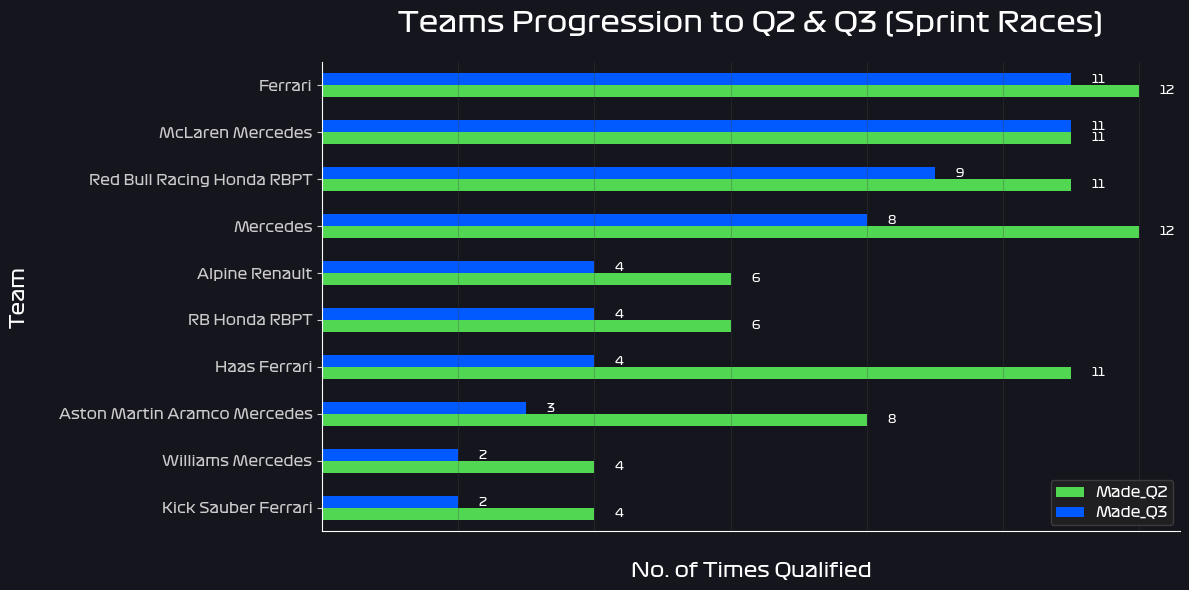

In [39]:
# ----- Sprint Qualifying Results Data Visualization -----
import numpy as np

set_f1_dark_theme

for col in ['Q1', 'Q2', 'Q3']:
    sprintQualifyingResults[col] = (sprintQualifyingResults[col].astype(str).str.strip().replace({'DNQ': np.nan, 'DNF':np.nan, 'NC':np.nan, '': np.nan}))

for col in ['Q1', 'Q2', 'Q3']:
    sprintQualifyingResults[col] = sprintQualifyingResults[col].replace('nan', np.nan)

sprintQualifyingResults_numeric = sprintQualifyingResults.copy()

sprintQualifyingResults_numeric['Made_Q2'] = sprintQualifyingResults_numeric['Q2'].notna()
sprintQualifyingResults_numeric['Made_Q3'] = sprintQualifyingResults_numeric['Q3'].notna()

team_progress = sprintQualifyingResults_numeric.groupby('Team')[['Made_Q2', 'Made_Q3']].sum()

team_progress_sorted = team_progress.sort_values(by='Made_Q3', ascending=True)
team_colors = assign_color_teams(team_progress_sorted.index.tolist())

team_progress_sorted.plot(
    kind='barh',
    figsize=(12, 6),
    color=team_colors,
)
plt.title('Teams Progression to Q2 & Q3 (Sprint Races)', fontproperties=f1_font, fontsize=20, fontweight='bold', pad=22)
plt.xlabel('No. of Times Qualified', fontproperties=f1_font, fontsize=14)
plt.ylabel('Team', fontproperties=f1_font, fontsize=14)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', bottom=False, labelbottom=False)

for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        if width > 0:
            ax.text(width + 0.3, y, f"{int(width)}", va='center', ha='left', fontsize=8, color='white', fontproperties=f1_font)

plt.grid(axis='x', alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [40]:
# 2024 Sprint Results
sprintResults

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
0,China,1,1,Max Verstappen,Red Bull Racing Honda RBPT,4,19,32:04.660,8
1,China,2,44,Lewis Hamilton,Mercedes,2,19,+13.043,7
2,China,3,11,Sergio Perez,Red Bull Racing Honda RBPT,6,19,+15.258,6
3,China,4,16,Charles Leclerc,Ferrari,7,19,+17.486,5
4,China,5,55,Carlos Sainz,Ferrari,5,19,+20.696,4
...,...,...,...,...,...,...,...,...,...
115,Qatar,16,30,Liam Lawson,RB Honda RBPT,10,19,+34.356,0
116,Qatar,17,22,Yuki Tsunoda,RB Honda RBPT,16,19,+35.102,0
117,Qatar,18,43,Franco Colapinto,Williams Mercedes,20,19,+35.639,0
118,Qatar,19,24,Guanyu Zhou,Kick Sauber Ferrari,18,19,+71.436,0


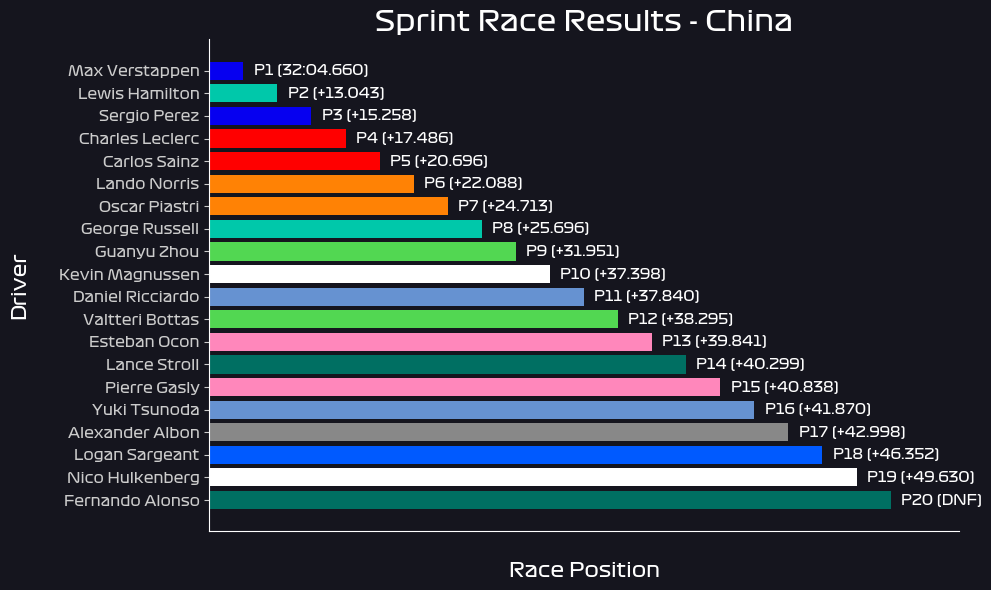

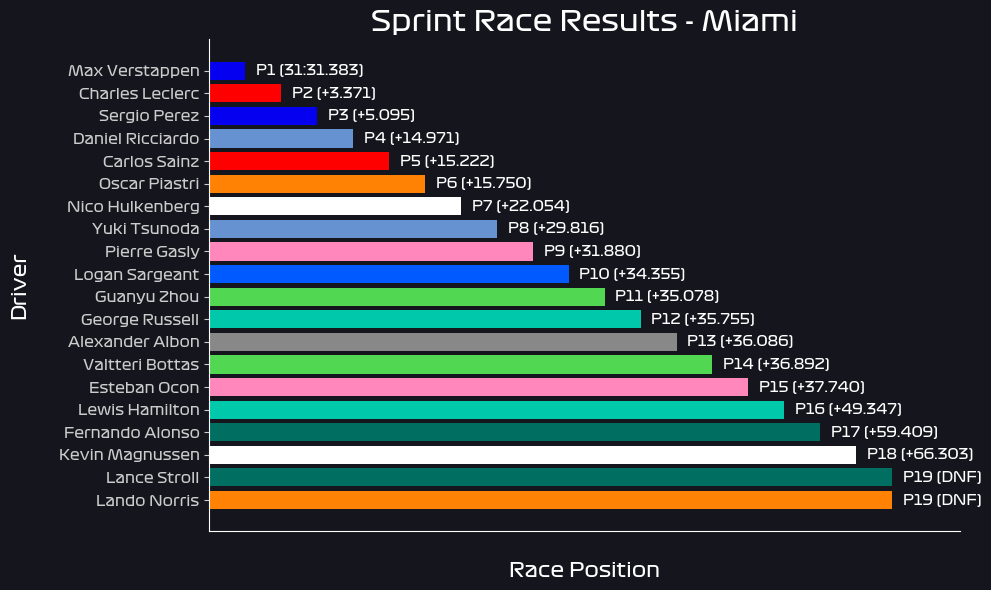

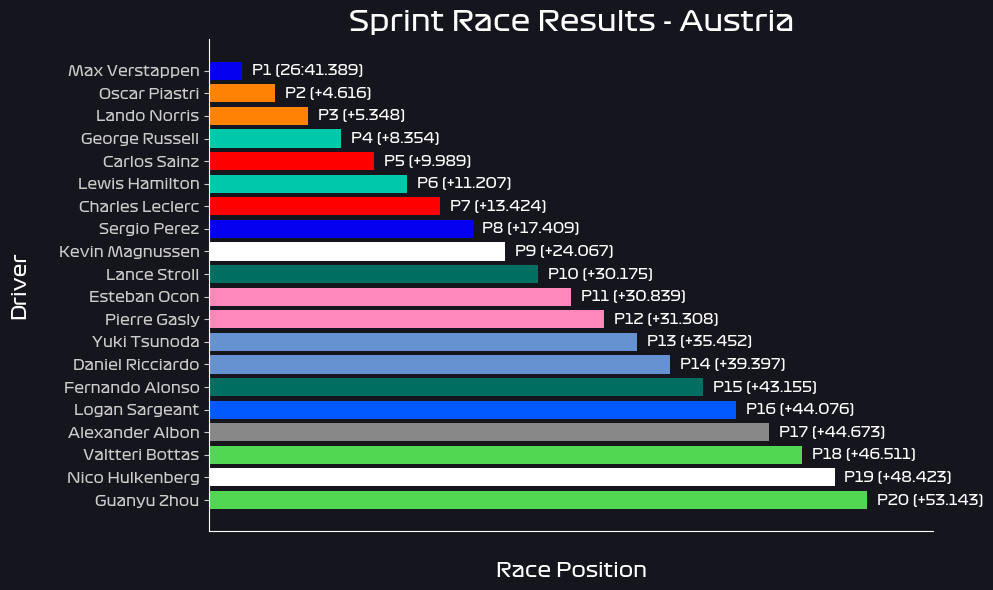

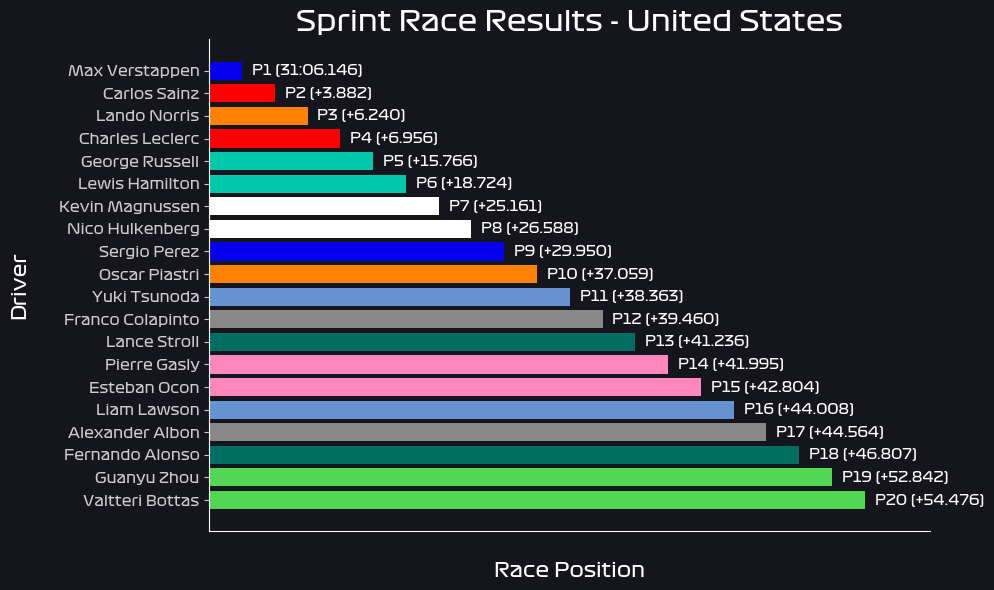

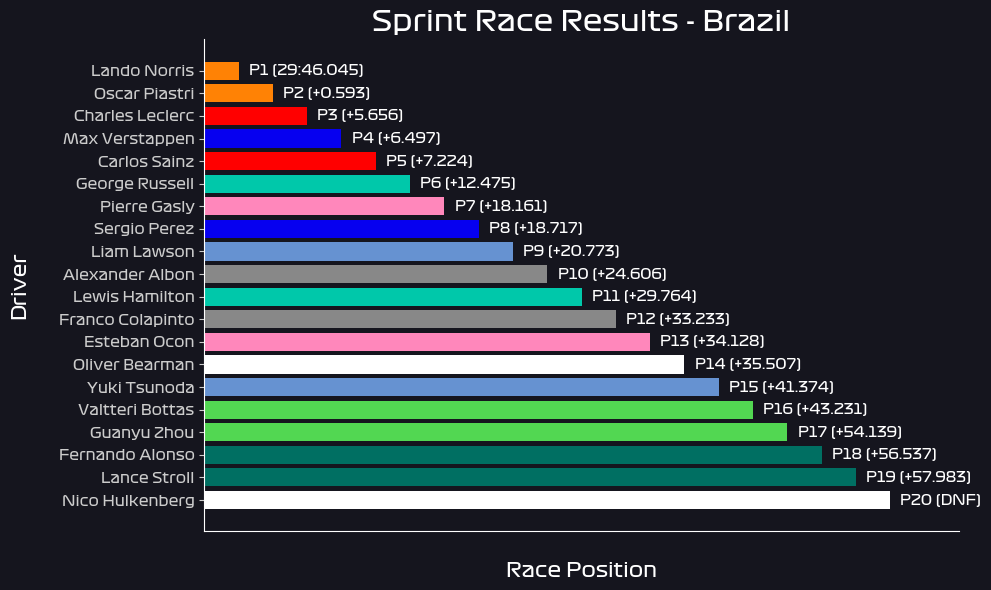

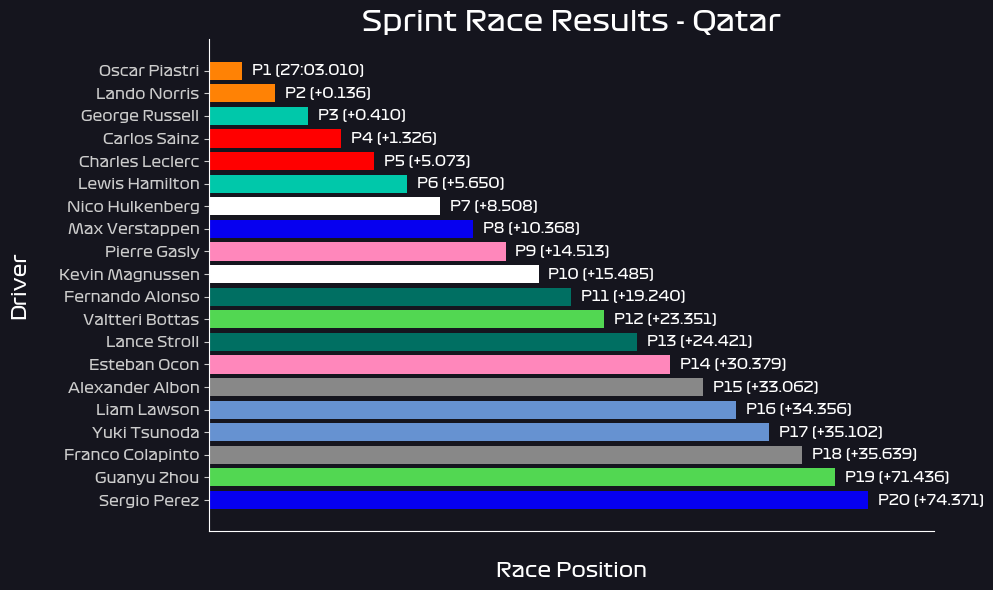

In [41]:
# ----- Sprint Race results (Data Visualization)-----
import matplotlib.pyplot as plt

set_f1_dark_theme

sprintResults['Track'] = sprintResults['Track'].astype(str).str.strip()
sprintResults['RawPosition'] = sprintResults['Position'].astype(str).str.strip()
sprintResults['Position'] = pd.to_numeric(sprintResults['RawPosition'], errors='coerce')


# Loop over each unique track
for track in sprintResults['Track'].unique():
    # Filter data for that specific track
    track_data = sprintResults[sprintResults['Track'] == track].sort_values(by='Position')

    if track_data.empty:
        continue

    drivers = track_data['Driver'].tolist()
    positions = track_data['Position'].fillna(track_data['Position'].max() + 1).tolist()
    raw_positions = track_data['RawPosition'].tolist()
    time = track_data['Time/Retired'].tolist()
    colors = assign_color_drivers(drivers)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(drivers, positions, color=colors)
    plt.gca().invert_yaxis()  # 1st position at the top

    plt.title(f'Sprint Race Results - {track}', fontproperties=f1_font, fontsize=20, fontweight='bold')
    plt.xlabel('Race Position', labelpad=22, fontproperties=f1_font, fontsize=14)
    plt.ylabel('Driver', labelpad=22, fontproperties=f1_font, fontsize=14)
    plt.margins(x=0.1) 

    for i, (pos, raw_pos, driver, timing) in enumerate(zip(positions, raw_positions, drivers, time)):
        if pd.isna(raw_pos):
            label = f"{timing}"
            xpos = 0.3
        else:
            label = f"P{int(pos)} ({timing})"
            xpos = pos + 0.3

        plt.text(xpos, i, label, va='center', ha='left', fontsize=10, color='white', fontproperties=f1_font)


    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', bottom=False, labelbottom=False)


    plt.tight_layout()
    plt.show()



In [42]:
qualifyingResults

,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1:30.031,1:29.374,1:29.179,17
1,Bahrain,2,16,Charles Leclerc,Ferrari,1:30.243,1:29.165,1:29.407,19
2,Bahrain,3,63,George Russell,Mercedes,1:30.350,1:29.922,1:29.485,17
3,Bahrain,4,55,Carlos Sainz,Ferrari,1:29.909,1:29.573,1:29.507,18
4,Bahrain,5,11,Sergio Perez,Red Bull Racing Honda RBPT,1:30.221,1:29.932,1:29.537,17
...,...,...,...,...,...,...,...,...,...
473,Abu Dhabi,16,23,Alexander Albon,Williams Mercedes,1:23.821,NaN,NaN,6
474,Abu Dhabi,17,24,Guanyu Zhou,Kick Sauber Ferrari,1:23.880,NaN,NaN,6
475,Abu Dhabi,18,44,Lewis Hamilton,Mercedes,1:23.887,NaN,NaN,7
476,Abu Dhabi,19,43,Franco Colapinto,Williams Mercedes,1:23.912,NaN,NaN,6


In [43]:
# Weekend Qualifying Results
# ----- Race Weekend Qualifying Results ----- 

# Fill Missing Values with N/A
qualifyingResults = qualifyingResults.fillna('DNQ')

# columns to insert
results = ['Track', 'Position', 'Driver', 'Team', 'Q1', 'Q2', 'Q3', 'Laps']
qualifyingResults[results]

,Track,Position,Driver,Team,Q1,Q2,Q3,Laps
0,Bahrain,1,Max Verstappen,Red Bull Racing Honda RBPT,1:30.031,1:29.374,1:29.179,17
1,Bahrain,2,Charles Leclerc,Ferrari,1:30.243,1:29.165,1:29.407,19
2,Bahrain,3,George Russell,Mercedes,1:30.350,1:29.922,1:29.485,17
3,Bahrain,4,Carlos Sainz,Ferrari,1:29.909,1:29.573,1:29.507,18
4,Bahrain,5,Sergio Perez,Red Bull Racing Honda RBPT,1:30.221,1:29.932,1:29.537,17
...,...,...,...,...,...,...,...,...
473,Abu Dhabi,16,Alexander Albon,Williams Mercedes,1:23.821,DNQ,DNQ,6
474,Abu Dhabi,17,Guanyu Zhou,Kick Sauber Ferrari,1:23.880,DNQ,DNQ,6
475,Abu Dhabi,18,Lewis Hamilton,Mercedes,1:23.887,DNQ,DNQ,7
476,Abu Dhabi,19,Franco Colapinto,Williams Mercedes,1:23.912,DNQ,DNQ,6


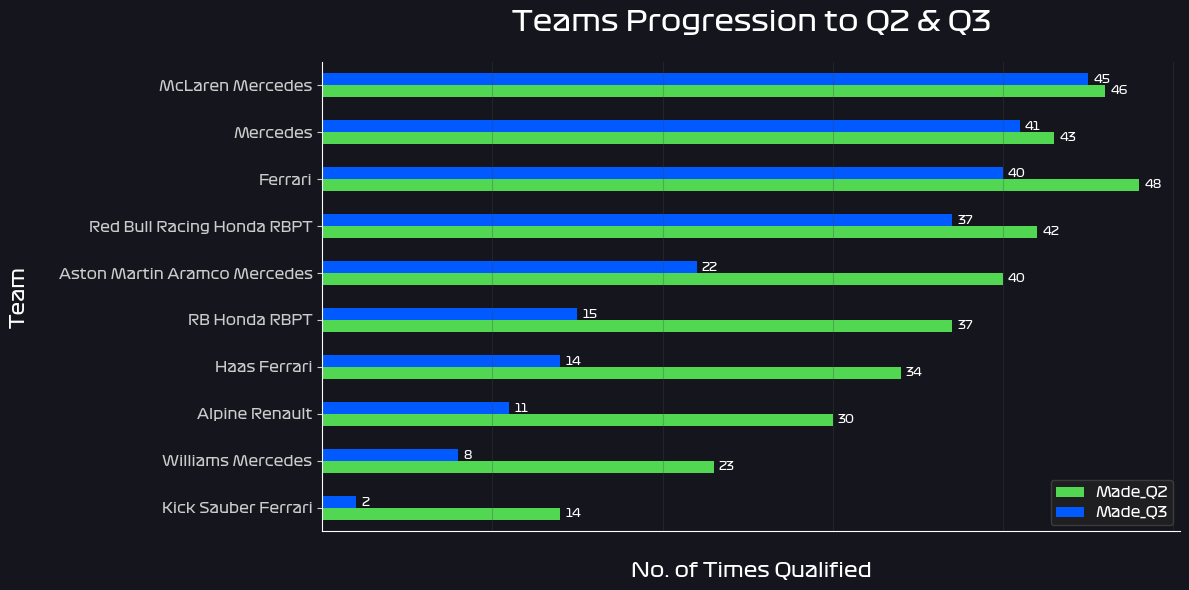

In [44]:
# ----- Weekend Qualifying Results Data Visualization -----
import matplotlib.pyplot as plt
import numpy as np

set_f1_dark_theme

for col in ['Q1', 'Q2', 'Q3']:
    qualifyingResults[col] = (qualifyingResults[col].astype(str).str.strip().replace({'DNQ': np.nan, 'DNF':np.nan, 'NC':np.nan, '': np.nan}))

for col in ['Q1', 'Q2', 'Q3']:
    qualifyingResults[col] = qualifyingResults[col].replace('nan', np.nan)

qualifyingResults_numeric = qualifyingResults.copy()

qualifyingResults_numeric['Made_Q2'] = qualifyingResults_numeric['Q2'].notna()
qualifyingResults_numeric['Made_Q3'] = qualifyingResults_numeric['Q3'].notna()

grandPrixs_team_progress = qualifyingResults_numeric.groupby('Team')[['Made_Q2', 'Made_Q3']].sum()

grandPrixs_team_progress_sorted = grandPrixs_team_progress.sort_values(by='Made_Q3', ascending=True)
team_colors = assign_color_teams(grandPrixs_team_progress_sorted.index.tolist())

grandPrixs_team_progress_sorted.plot(
    kind='barh',
    figsize=(12, 6),
    color=team_colors,
)
plt.title('Teams Progression to Q2 & Q3', fontproperties=f1_font, fontsize=20, fontweight='bold', pad=22)
plt.xlabel('No. of Times Qualified', fontproperties=f1_font, fontsize=14)
plt.ylabel('Team', fontproperties=f1_font, fontsize=14)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', bottom=False, labelbottom=False)

for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        if width > 0:
            ax.text(width + 0.3, y, f"{int(width)}", va='center', ha='left', fontsize=8, color='white', fontproperties=f1_font)

plt.grid(axis='x')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


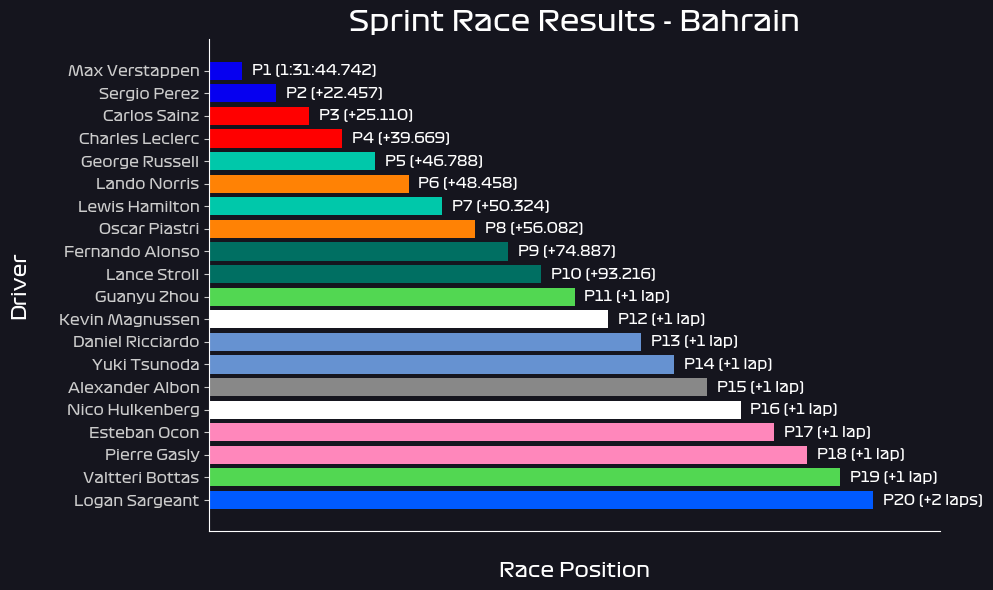

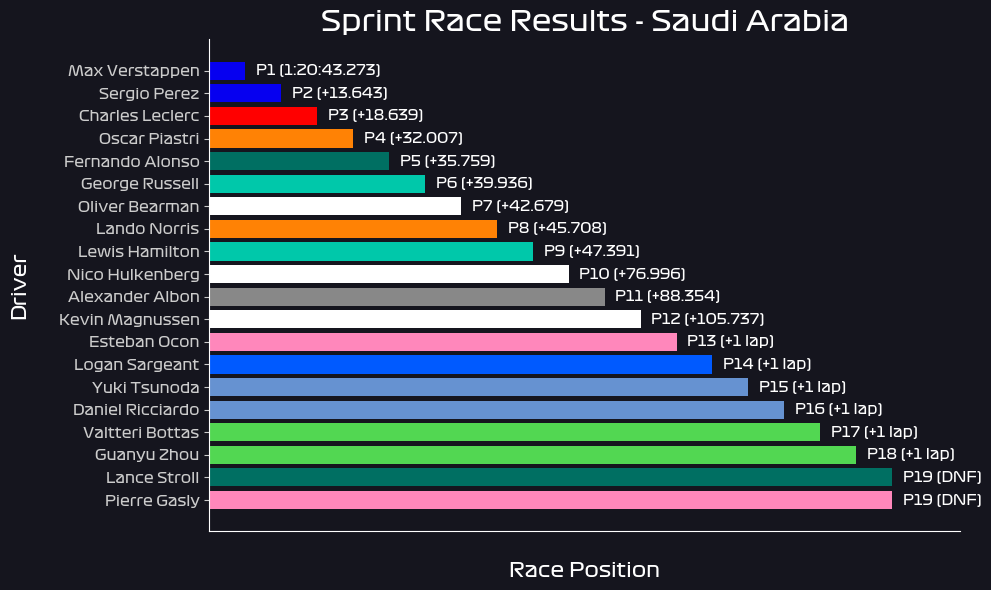

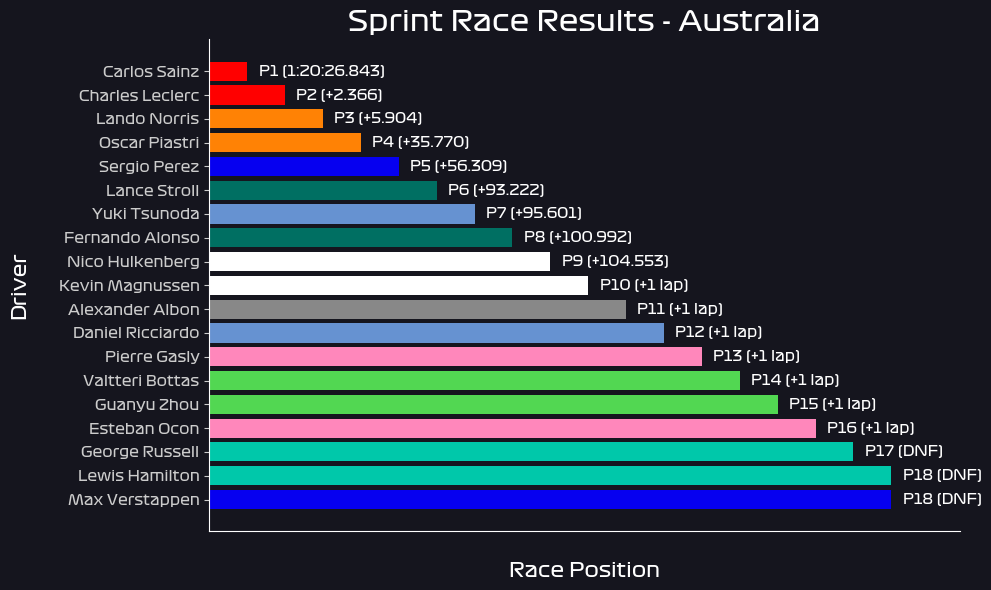

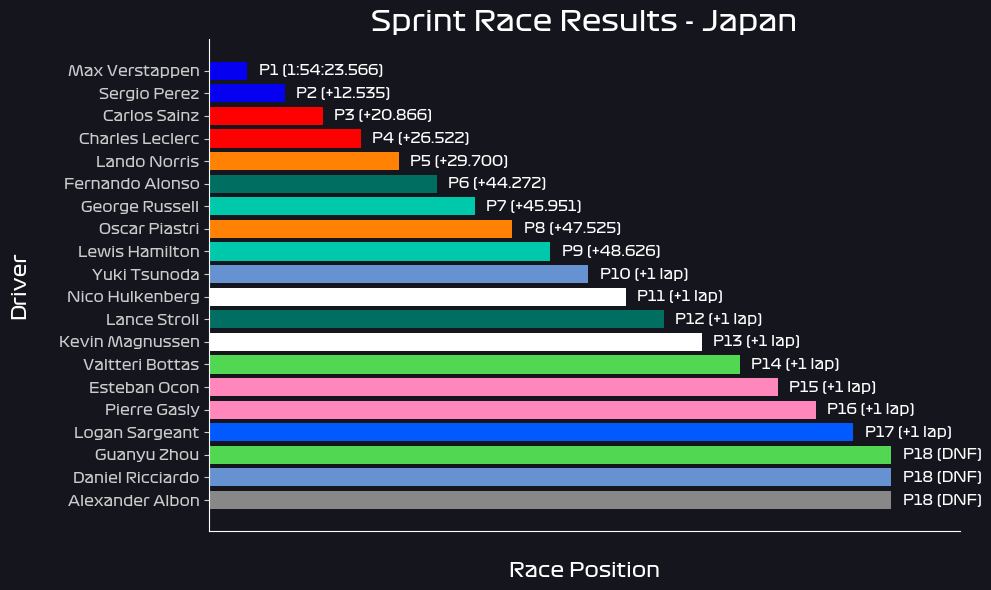

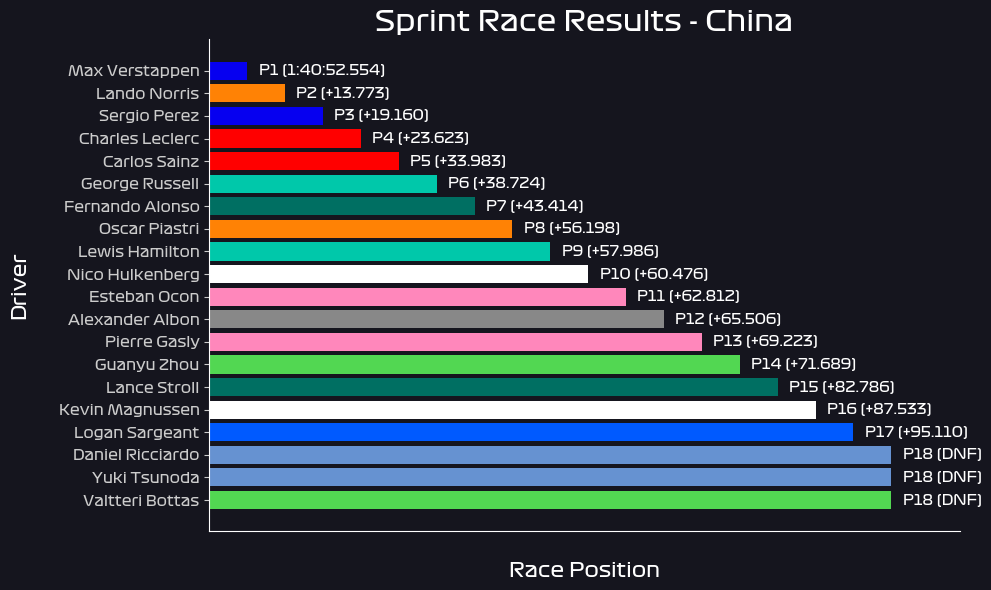

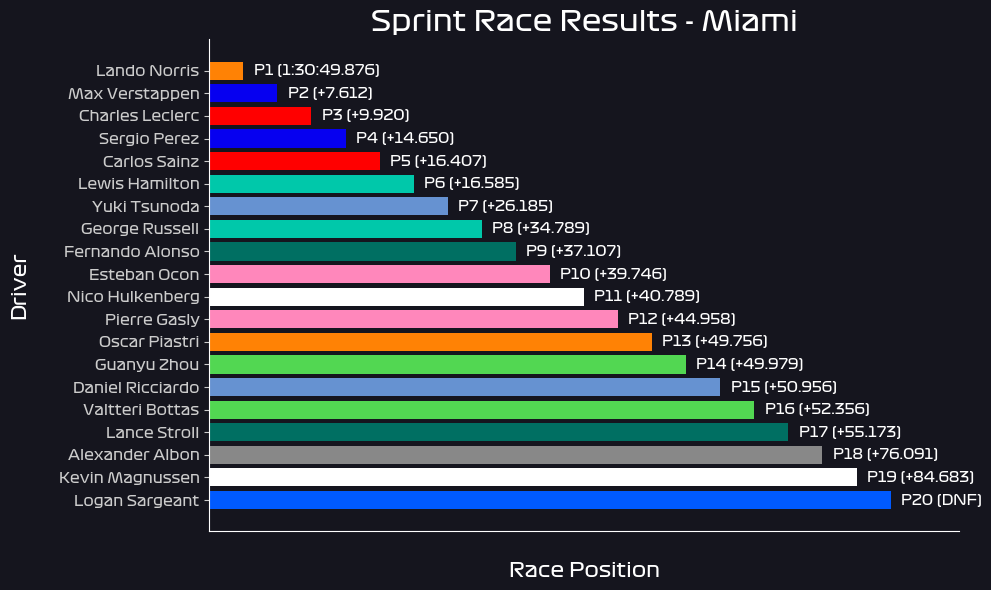

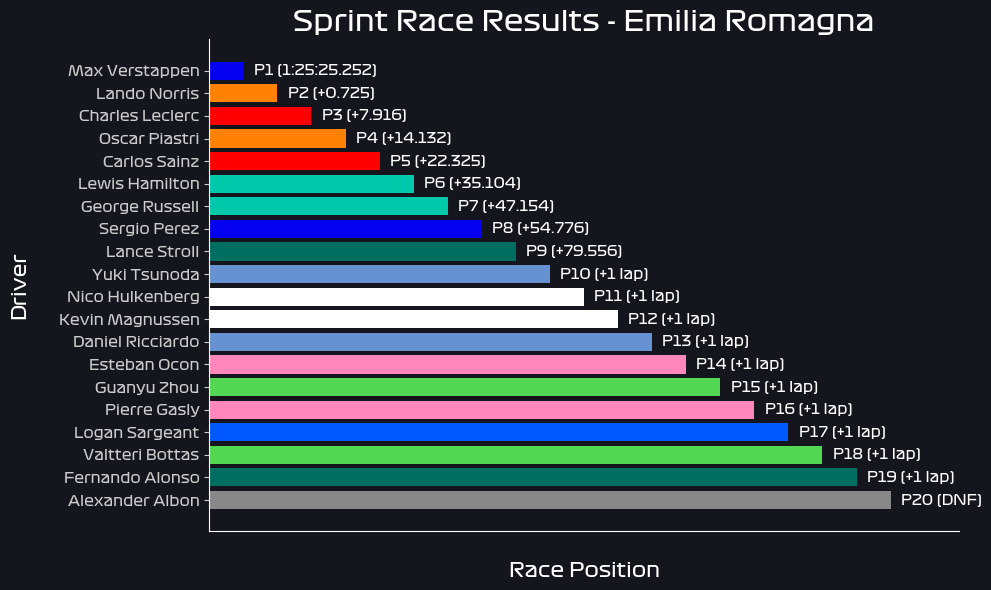

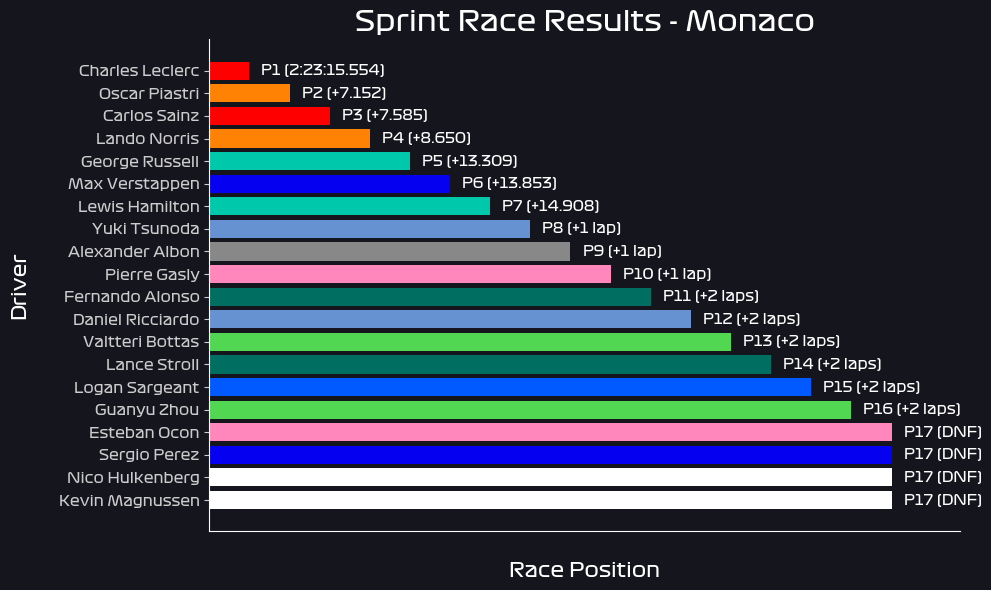

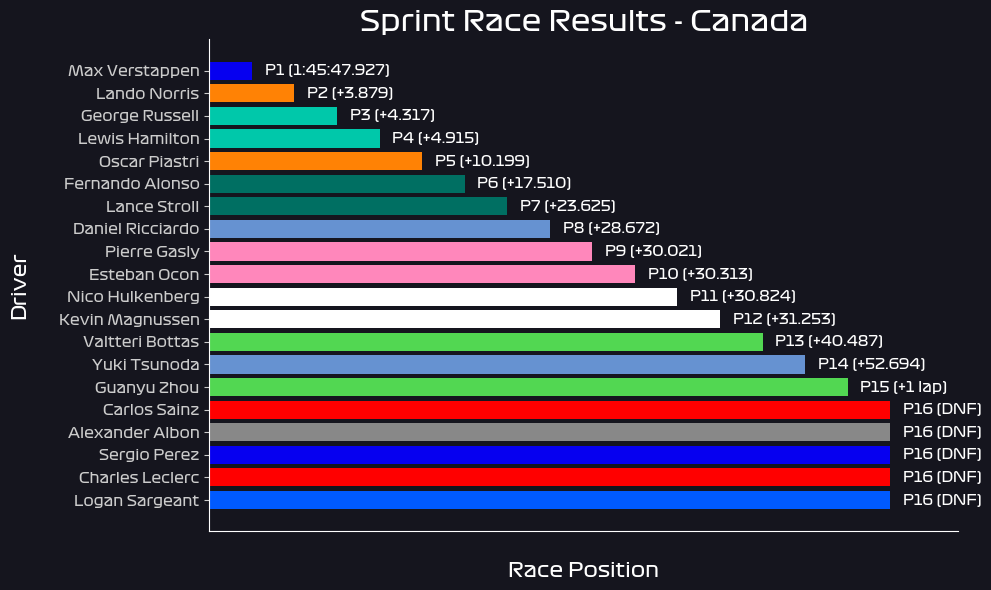

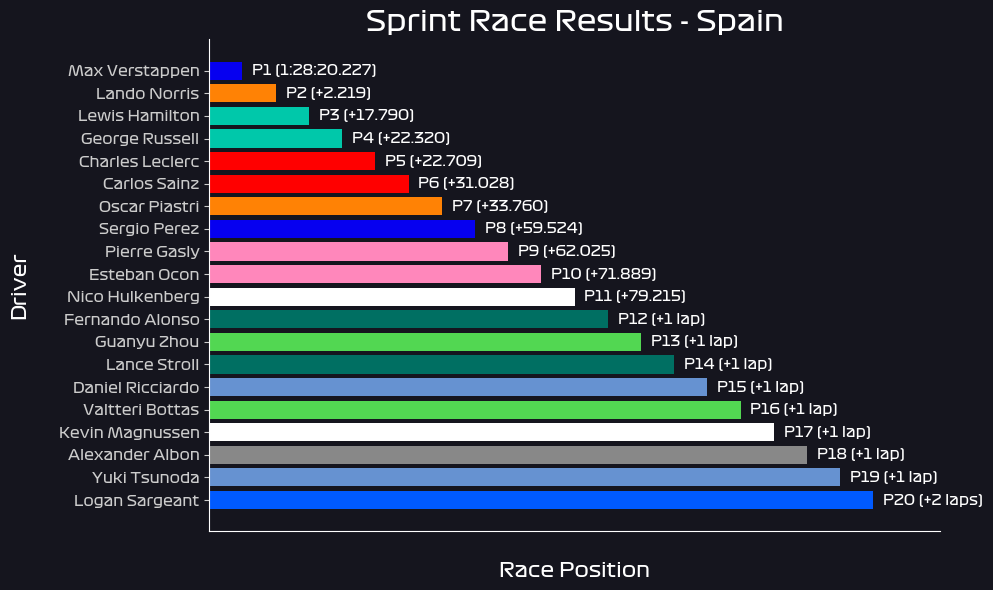

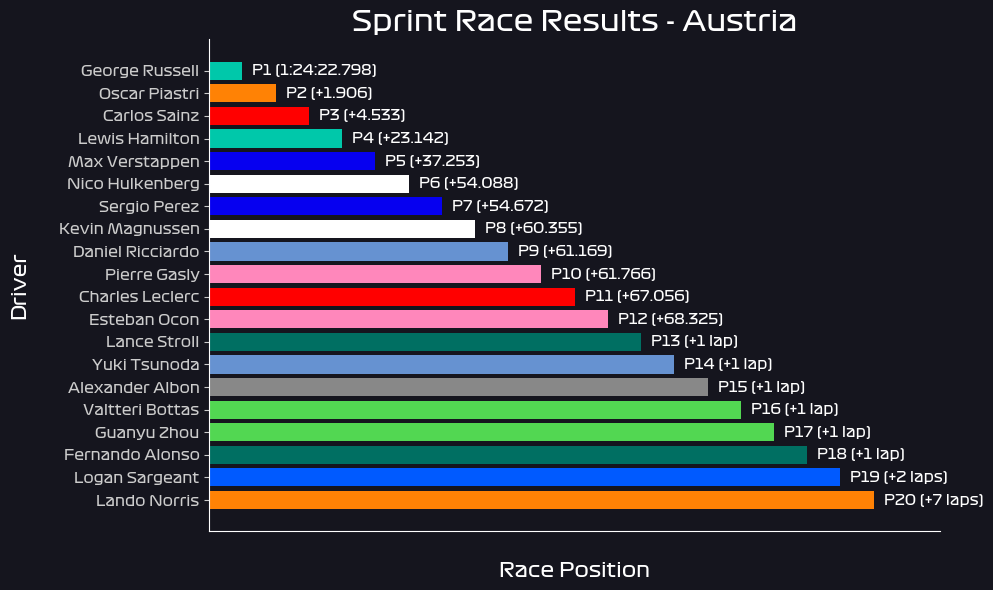

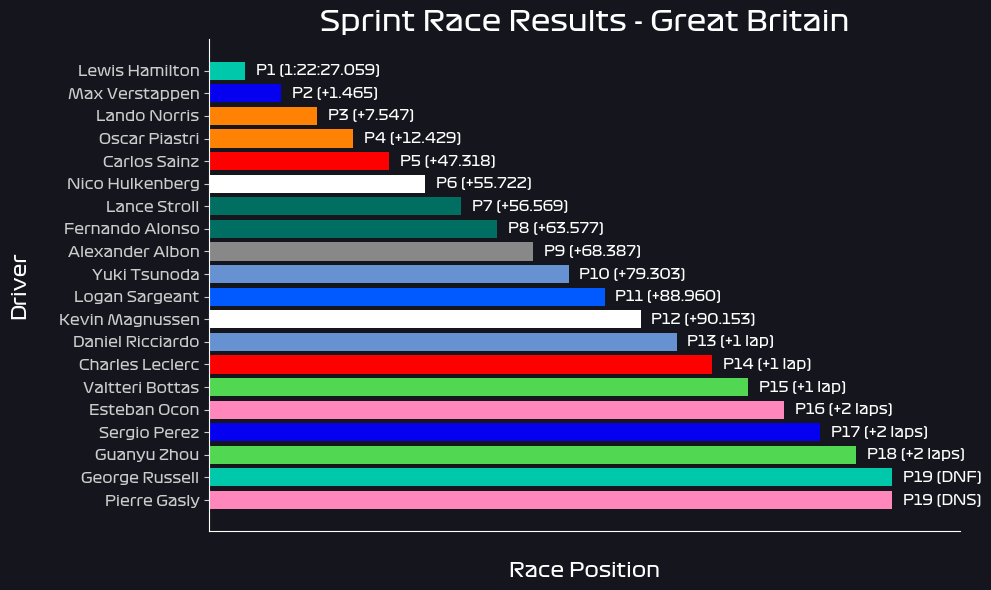

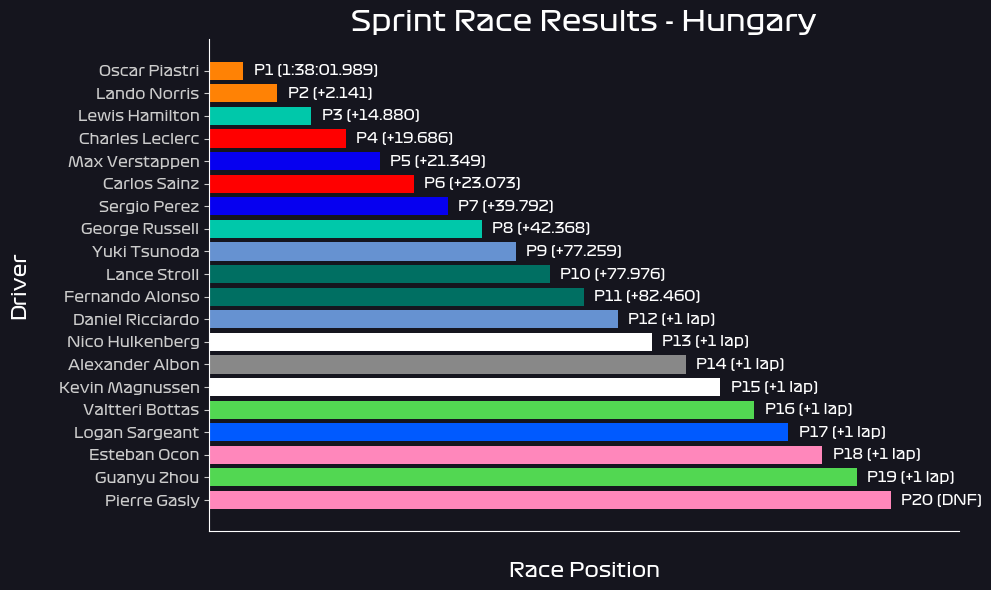

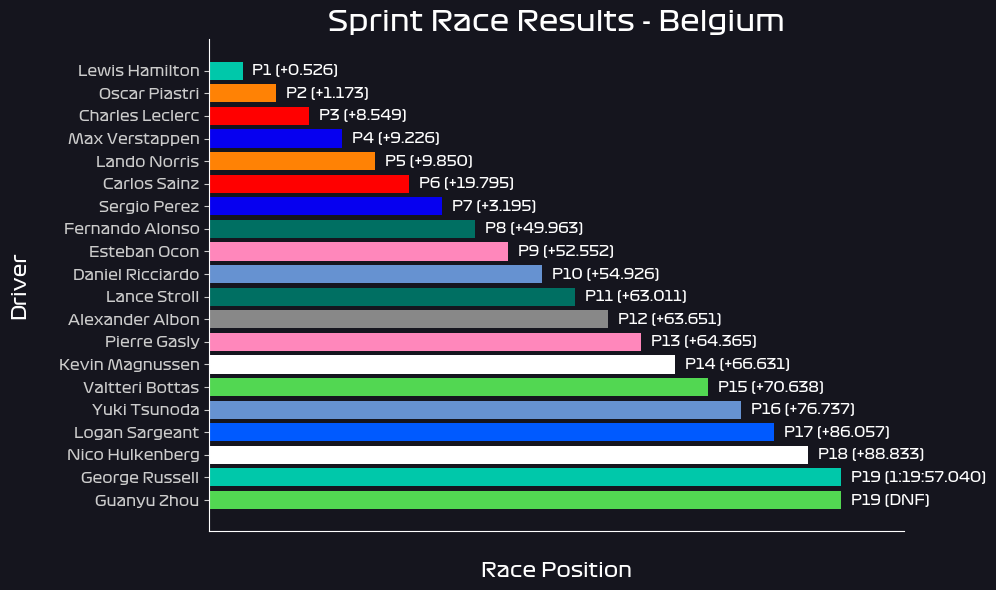

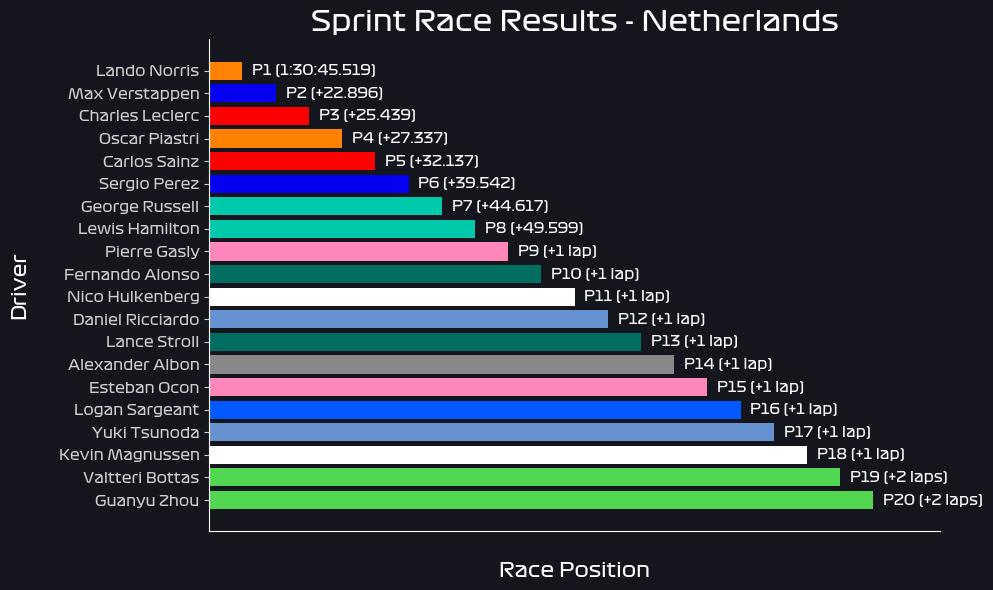

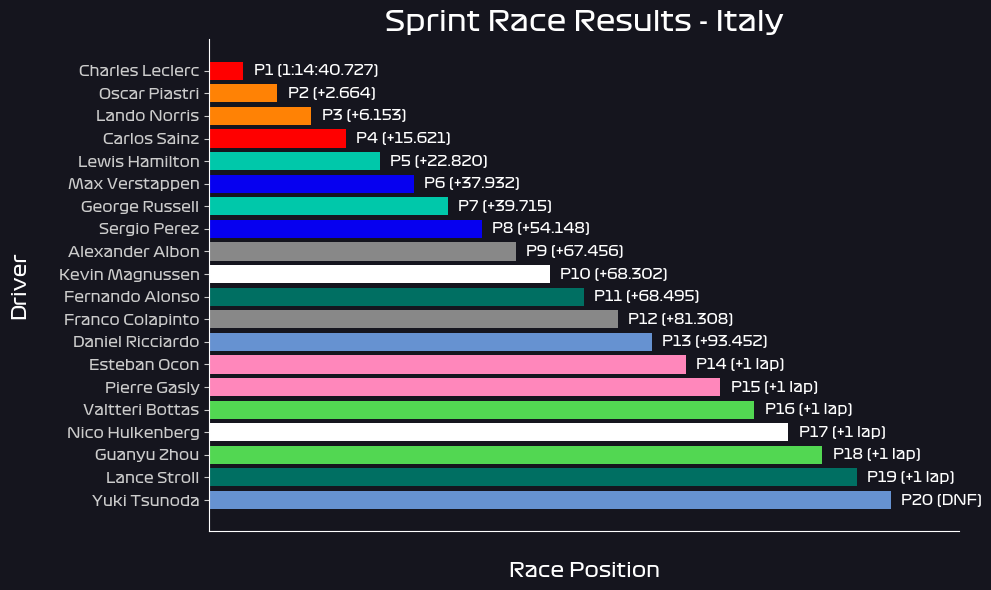

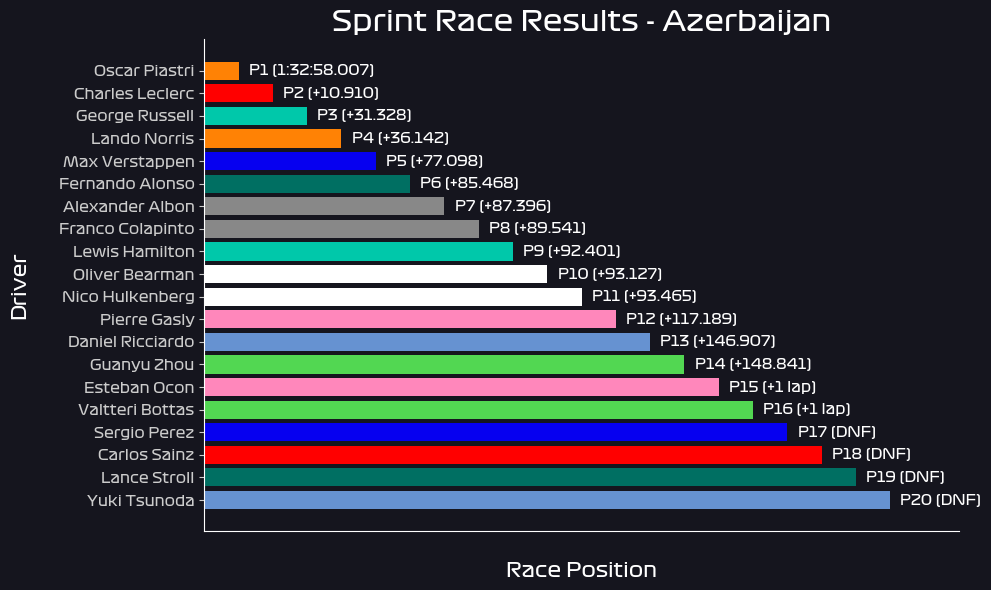

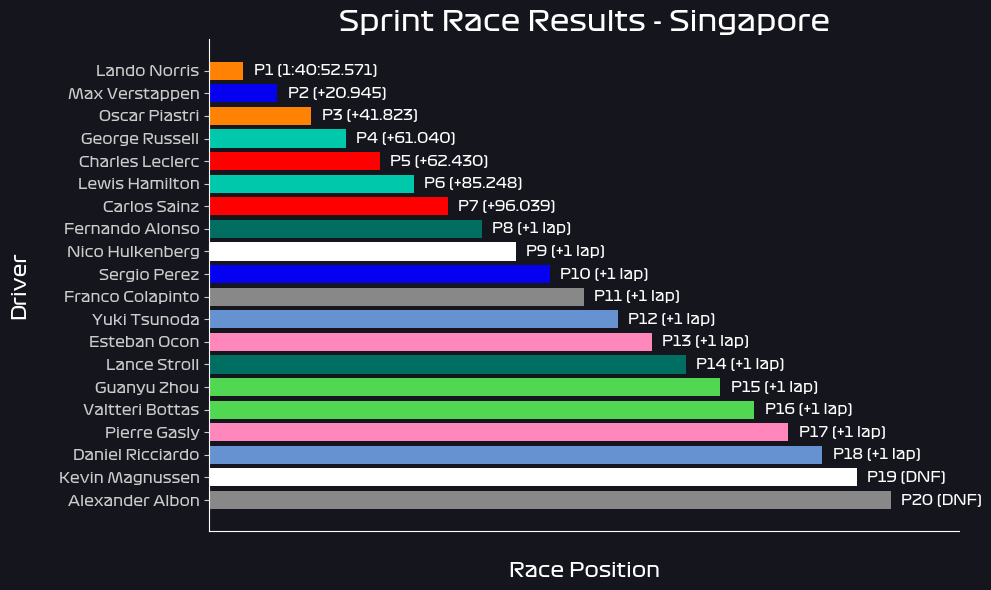

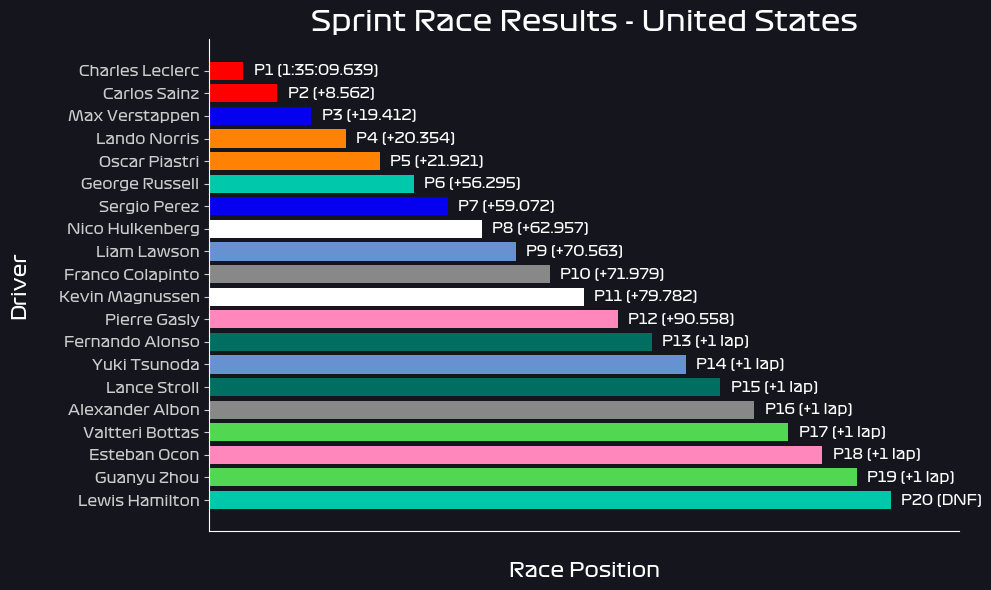

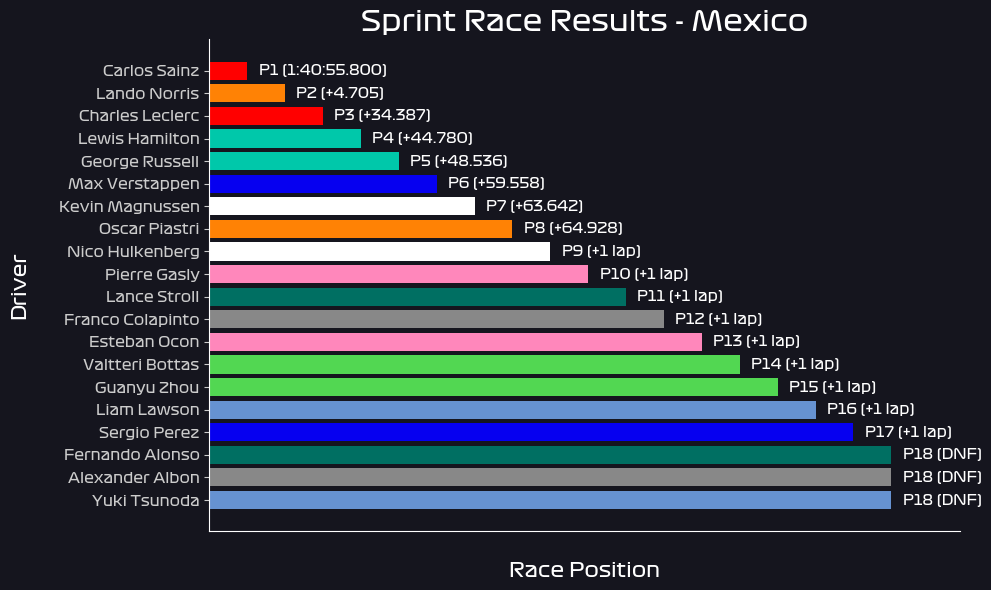

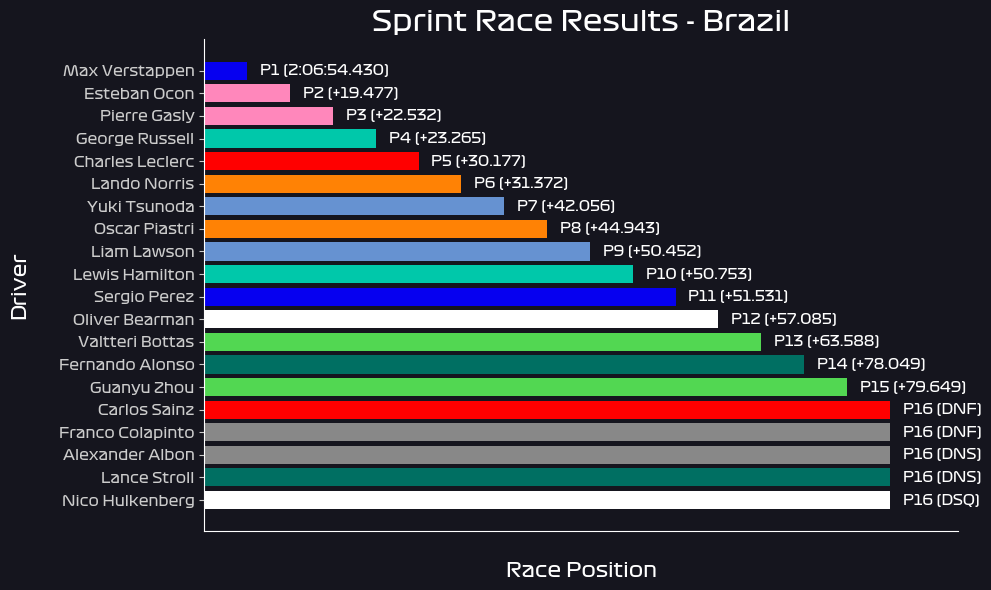

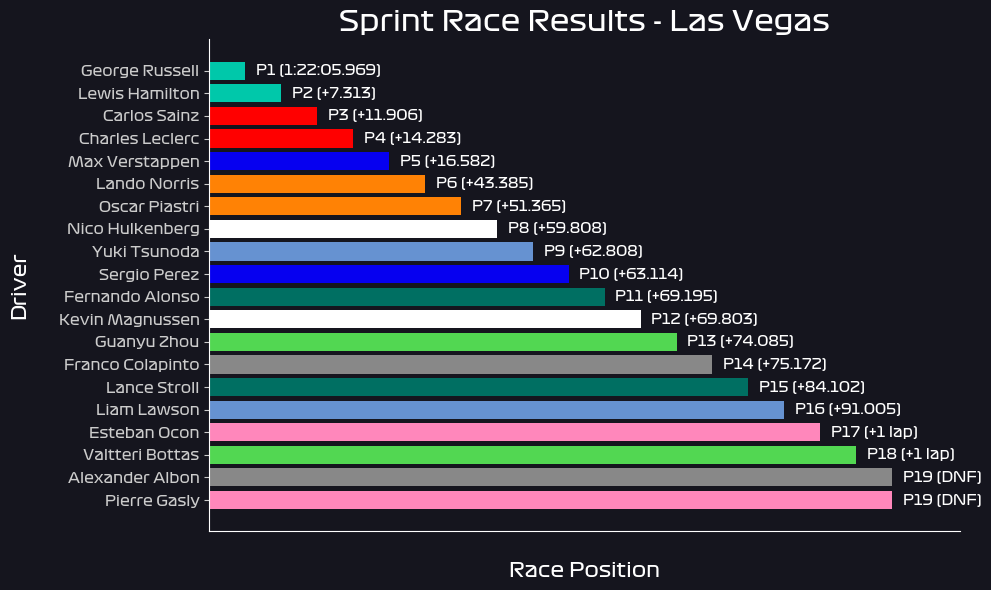

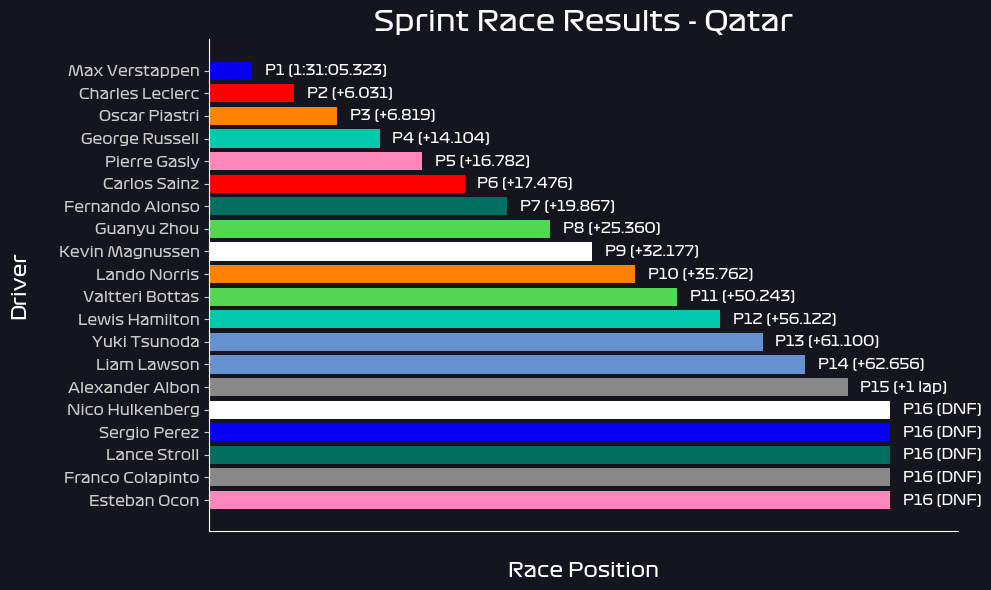

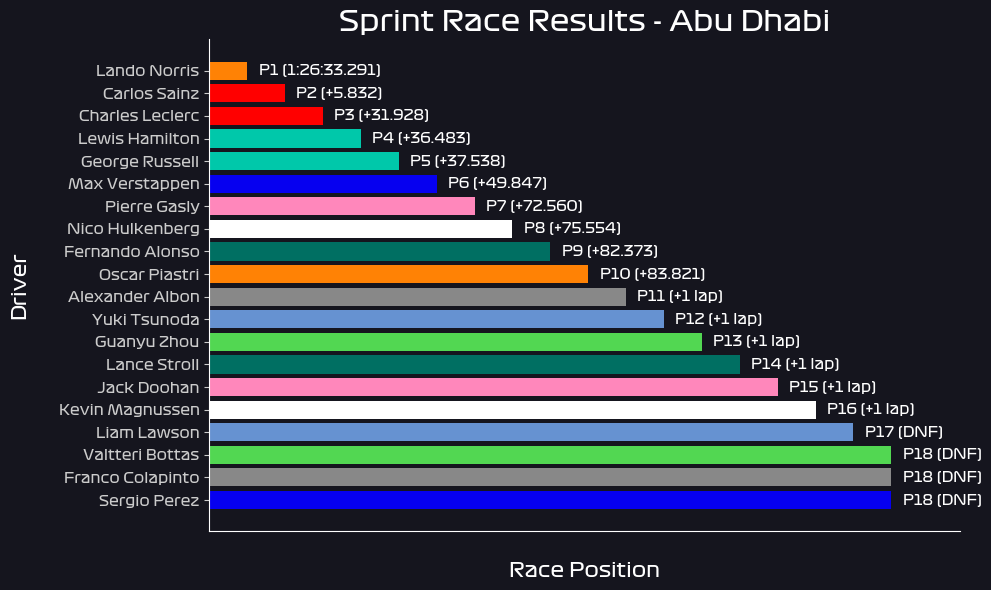

In [45]:
# ----- Grand Prix Race results (Data Visualization)-----
import matplotlib.pyplot as plt

set_f1_dark_theme

raceResults['Track'] = raceResults['Track'].astype(str).str.strip()
raceResults['RawPosition'] = raceResults['Position'].astype(str).str.strip()
raceResults['Position'] = pd.to_numeric(raceResults['RawPosition'], errors='coerce')


# Loop over each unique track
for track in raceResults['Track'].unique():
    # Filter data for that specific track
    track_data = raceResults[raceResults['Track'] == track].sort_values(by='Position')

    if track_data.empty:
        continue

    drivers = track_data['Driver'].tolist()
    positions = track_data['Position'].fillna(track_data['Position'].max() + 1).tolist()
    raw_positions = track_data['RawPosition'].tolist()
    time = track_data['Time/Retired'].tolist()
    colors = assign_color_drivers(drivers)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(drivers, positions, color=colors)
    plt.gca().invert_yaxis()  # 1st position at the top

    plt.title(f'Sprint Race Results - {track}', fontproperties=f1_font, fontsize=20, fontweight='bold')
    plt.xlabel('Race Position', labelpad=22, fontproperties=f1_font, fontsize=14)
    plt.ylabel('Driver', labelpad=22, fontproperties=f1_font, fontsize=14)
    plt.margins(x=0.1) 

    for i, (pos, raw_pos, driver, timing) in enumerate(zip(positions, raw_positions, drivers, time)):
        if pd.isna(raw_pos):
            label = f"{timing}"
            xpos = 0.3
        else:
            label = f"P{int(pos)} ({timing})"
            xpos = pos + 0.3

        plt.text(xpos, i, label, va='center', ha='left', fontsize=10, color='white', fontproperties=f1_font)


    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', bottom=False, labelbottom=False)


    plt.tight_layout()
    plt.show()



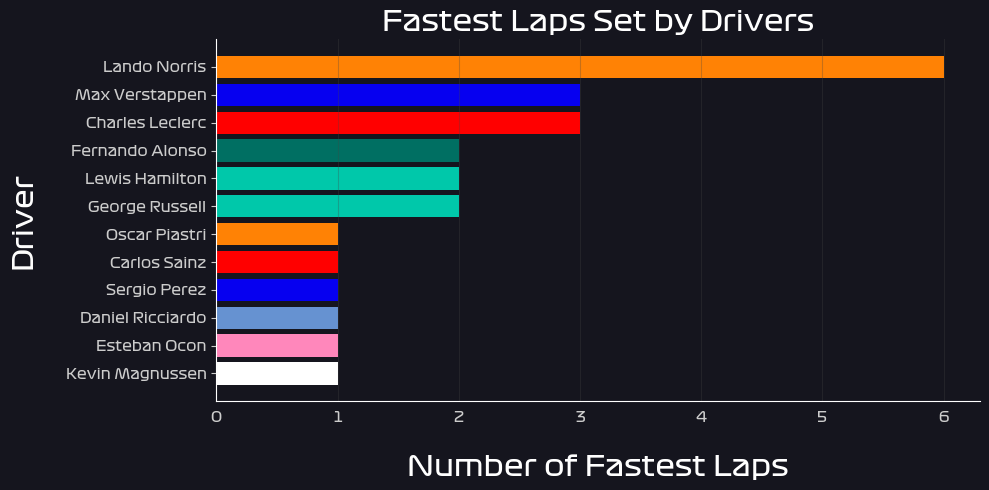

In [57]:
fastest_lap_driver = raceResults[raceResults['Set Fastest Lap'] == 'Yes']

fastest_lap_counts = fastest_lap_driver['Driver'].value_counts()

colors= assign_color_drivers(fastest_lap_counts.index)

# Plot
plt.figure(figsize=(10, 5))
plt.title('Fastest Laps Set by Drivers')

plt.barh(fastest_lap_counts.index, fastest_lap_counts.values, color=colors)

plt.xlabel('Number of Fastest Laps', fontsize=20)
plt.ylabel('Driver', fontsize=20)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', bottom=False)
plt.gca().invert_yaxis()

plt.grid(axis='x')

plt.tight_layout()
plt.show()


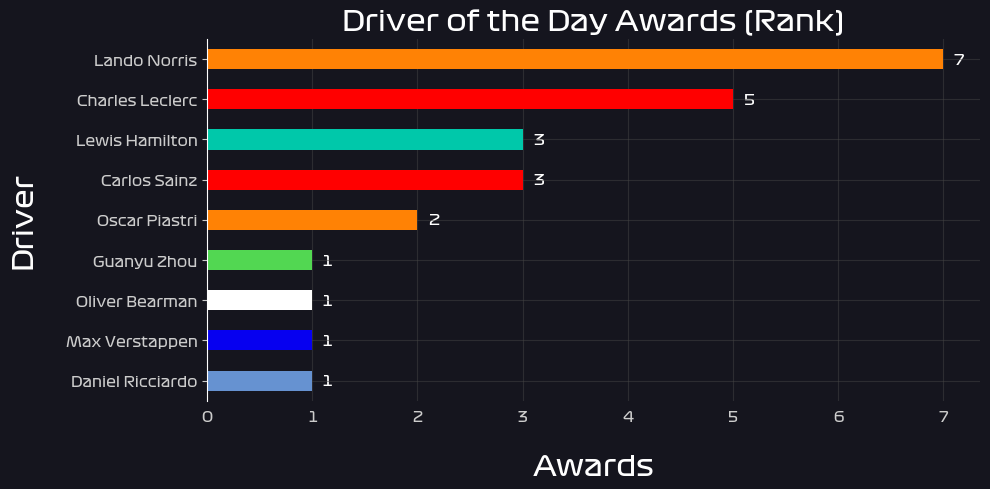

In [47]:
# ----- Driver of the day Awards (Data Visualization) -----
set_f1_dark_theme
driverOfTheDay_Awards = driverOfTheDay['1st Place'].value_counts()
driverOfTheDay_Awards = driverOfTheDay_Awards.sort_values()
idx = driverOfTheDay_Awards.index

# Plot 
driverOfTheDay_Awards.plot(
    kind='barh',
    figsize=(10,5),
    zorder=2,
    color=assign_color_drivers(driverOfTheDay_Awards.index)
)
plt.title('Driver of the Day Awards (Rank)')
plt.xlabel('Awards', fontsize=20, fontweight='bold')
plt.ylabel('Driver', fontsize=20, fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', bottom=False)

for i, (driver, count) in enumerate(zip(driverOfTheDay_Awards.index, driverOfTheDay_Awards.values)):
    plt.text(count + 0.1, i, str(count), va='center', fontweight='bold', fontsize=11, zorder=1)

plt.grid(axis='x', alpha=0.5, zorder=0)
plt.grid(axis='y', alpha=0.5, zorder=0)
plt.tight_layout()
plt.show()

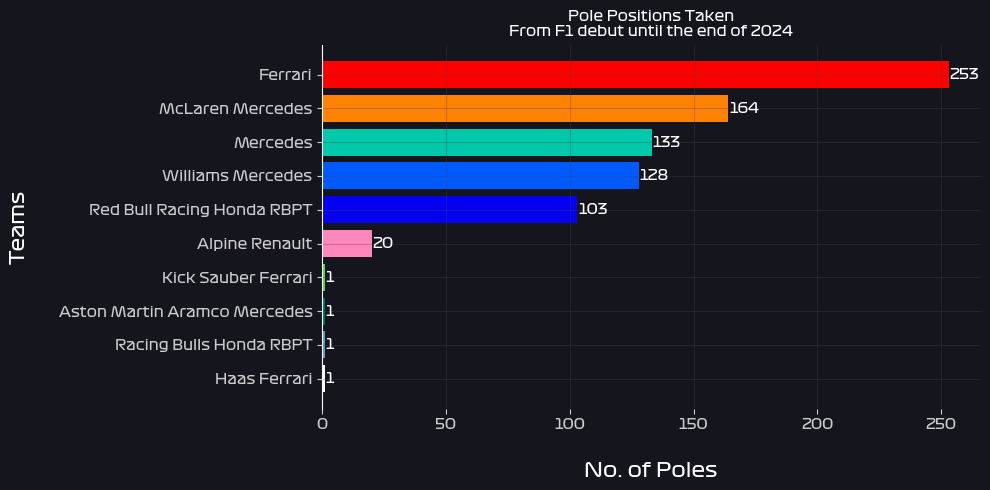

In [48]:
# Teams overall No. of poles since F1 debut
import matplotlib.pyplot as plt

set_f1_dark_theme()

# Sorting
seasonTeams_sorted = seasonTeams.sort_values(by='Pole Positions', ascending=True)

teams = seasonTeams_sorted['Team'].tolist()     
poles = seasonTeams_sorted['Pole Positions'].tolist() 
colors = assign_color_teams(teams)

# Create the plot
plt.figure(figsize=(10, 5))

plt.title('Pole Positions Taken\nFrom F1 debut until the end of 2024', fontsize=20, fontweight='bold', fontproperties=f1_font)
plt.ylabel('Teams', fontsize=14, fontweight='bold', fontproperties=f1_font)
plt.xlabel('No. of Poles', fontsize=14, fontweight='bold', fontproperties=f1_font)

bars = plt.barh(teams, poles, color=colors, alpha=1.0)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(axis='x', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

# Add pole numbers to end of each bar
for i, (value, team) in enumerate(zip(poles, teams)):
    plt.text(value + 0.3, i, str(value), va='center', ha='left', fontsize=10, color='white', fontproperties=f1_font)

plt.tight_layout()
plt.show()
